# ANALYSE TECHNIQUE 

[*********************100%***********************]  1 of 1 completed


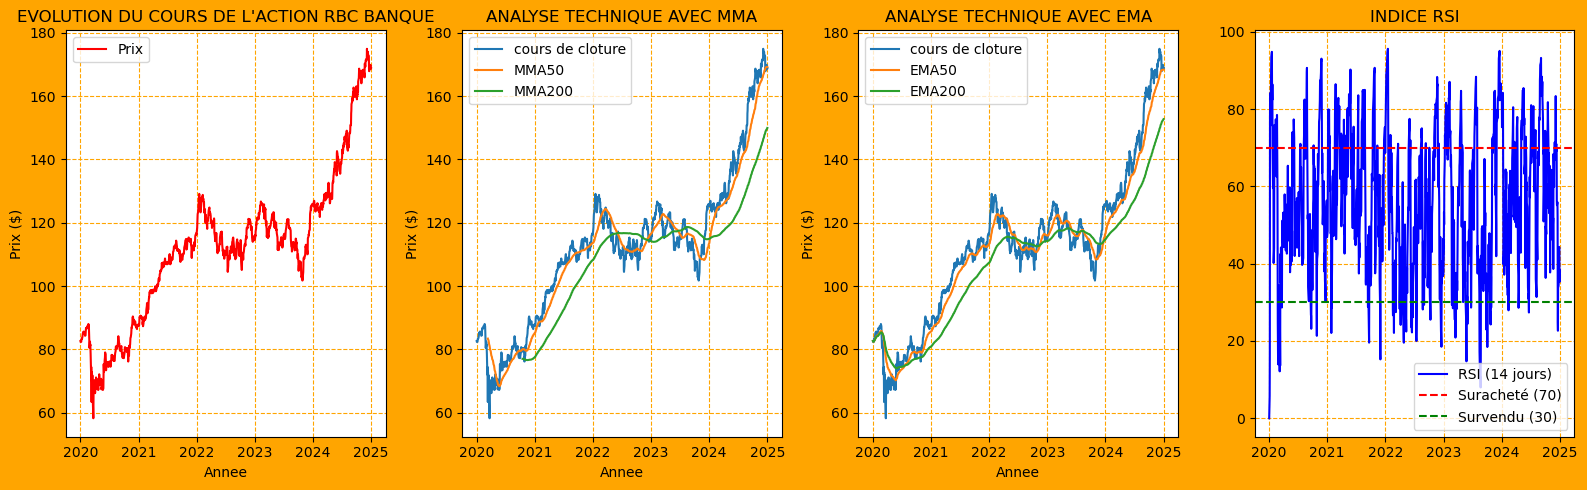

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
#Telechargement des donnees de RBC BANQUE
prix=yf.download("RY.TO",start='2020-1-1',end='2025-1-1',auto_adjust=True)
#Definition MMA
prix["MMA50"]=prix["Close"].rolling(window=50).mean()
prix["MMA200"]=prix["Close"].rolling(window=200).mean()
# Définition du EMA
prix["EMA50"]=prix["Close"].ewm(span=50).mean()
prix["EMA200"]=prix["Close"].ewm(span=200).mean()
#Indice de force relative (RSI)
delta = prix["Close"].diff() # variations journalières
gain = delta.where(delta > 0, 0) # Gains 
loss = -delta.where(delta < 0, 0) # Pertes
gain_moy = gain.ewm(span=14, adjust=False).mean() # Moyenne exponentielle des gains sur 14 periodes
perte_moy = loss.ewm(span=14, adjust=False).mean() # Moyenne exponentielle des pertes sur 14 periodes
rs = gain_moy / perte_moy  # Calcul du RS 
rsi = 100 - (100 / (1 + rs)) # Calcul du RSI
#La representation graphique
#La courbe des prix
plt.figure(facecolor="orange",figsize=(16,5))
plt.subplot(141)
plt.plot(prix["Close"],color="r",label="Prix")
plt.xlabel("Annee")
plt.ylabel("Prix ($)")
plt.grid(linestyle="--",color="orange")
plt.title("EVOLUTION DU COURS DE L'ACTION RBC BANQUE")
plt.legend() 
# La courbe MMA
plt.subplot(142)
plt.plot(prix["Close"],label="cours de cloture")
plt.plot(prix["MMA50"],label="MMA50")
plt.plot(prix["MMA200"],label="MMA200")
plt.ylabel("Prix ($)")
plt.xlabel("Annee")
plt.grid(linestyle="--",color="orange")
plt.title("ANALYSE TECHNIQUE AVEC MMA")
plt.legend() 
#La courbe EMA
plt.subplot(143)
plt.plot(prix["Close"],label="cours de cloture")
plt.plot(prix["EMA50"],label="EMA50")
plt.plot(prix["EMA200"],label="EMA200")
plt.ylabel("Prix ($)")
plt.xlabel("Annee")
plt.grid(linestyle="--",color="orange")
plt.title("ANALYSE TECHNIQUE AVEC EMA")
plt.legend()
# La courbe RSI
plt.subplot(144)
plt.plot(rsi, label="RSI (14 jours)", color="b")
plt.axhline(70, color='red', linestyle='--', label="Suracheté (70)")
plt.axhline(30, color='green', linestyle='--', label="Survendu (30)")
plt.title("INDICE RSI")
plt.grid(linestyle="--",color="orange")
plt.legend()
plt.tight_layout()
plt.show()